# Q4 : gaussian processes with more than one variable 

In [1]:
import numpy as np 

In [2]:
def x1(t):
    return 1.5*t

def x2(t):
    return np.sin(t) 

def f(t):
    
    return x1(t)**1.25 + x2(t) + x1(t)*x2(t)


In [3]:
t = np.linspace(0, 10, 1000)

x1_ = x1(t)
x2_ = x2(t)

f_ = f(t)

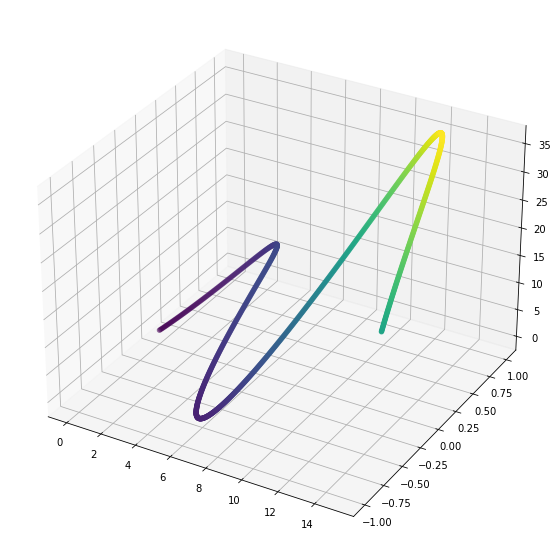

In [4]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(20, 10))

ax = plt.axes(projection='3d')

ax.scatter3D(x1_, x2_, f_, c=f_);

In [5]:
x_train = np.concatenate([x1_.reshape(1000, 1), x2_.reshape(1000, 1)], axis = 1)
y_train = f_.reshape(1000, 1) + 1.0*np.random.randn(1000, 1)

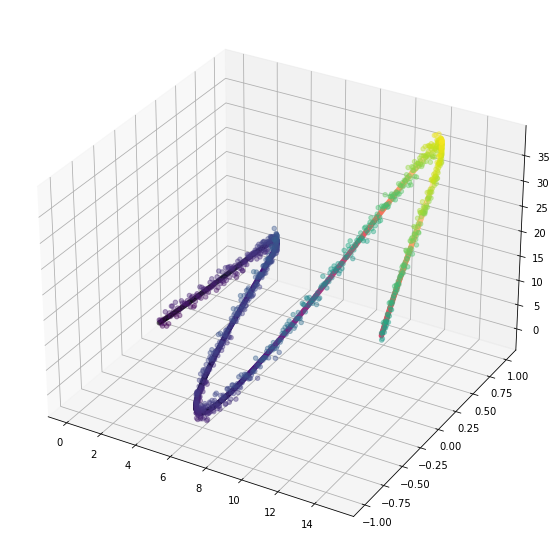

In [6]:
fig = plt.figure(figsize=(20, 10))

ax = plt.axes(projection='3d')

ax.scatter3D(x_train[:, 0], x_train[:, 1], y_train, c=y_train, alpha=0.4)
ax.scatter3D(x1_, x2_, f_, c=f_, cmap='magma')

# using the model implemented in the script file :

In [7]:
import Q4_UTIL as GP

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Make some 2D training data
N_grid = 1000         # Input points will be distributed across a 10x10 grid
N = N_grid**2       # Total no. training data points is therefore N_grid**2
r = np.linspace(0, 10, N_grid)  # Inputs range from 0 to 10 in both directions

x1_ = x1(r)
x2_ = x2(r)

f_ = f(r)

X_grid1, X_grid2 = np.meshgrid(x1_, x2_)  # Form mesh grid for X


In [10]:
Y_grid = np.zeros([N_grid, N_grid])   # Form mesh grid for y
X = np.zeros([N, 2])    # Initialise X values
Y = np.zeros(N)         # Initialise y values
n = 0

def F(x):
    return x[0]**1.25 + x[1] + x[0]*x[1]

for i in range(N_grid):
    for j in range(N_grid):
        
        x = np.array([X_grid1[i, j], X_grid2[i, j]])
        X[n, :] = x

        # True function :
        
        y = F(x) + 0.2 * np.random.randn()
        

        Y_grid[i, j] = y
        Y[n] = y
        n += 1



In [11]:
X_train = np.concatenate([x1_.reshape(1000, 1), x2_.reshape(1000, 1)], axis=1)

In [12]:
Y_train = f(r) + np.random.randn()

In [13]:
X_train = X[:1000, :]
Y_train = Y[:1000]

In [14]:
# Train GP
L0 = 0.5        # Initial length scale
Sigma0 = 0.1    # Initial noise standard deviation
L, Sigma, K, C, InvC, elapsed_time = GP.Train(L0, Sigma0, X_train, Y_train, 1000)  # Train GP
print('Hyperparameters:', L, Sigma)      # Print hyperparameters
print('Elapsed Time:', elapsed_time)     # Print time taken to train GP



Hyperparameters: 3.9662132644526666 0.19899032939504088
Elapsed Time: 1.844954013824463


In [15]:
# Make some predictions
N_Star = 1200  
r_star = np.linspace(0, 12, N_Star)             # Input points
X_star = np.concatenate([x1(r_star).reshape(1200, 1), x2(r_star).reshape(1200, 1)], axis=1) # Form mesh grid for X_star
Y_StarMean = np.zeros(N_Star)         # mean of GP predictions
Y_StarStd = np.zeros(N_Star)          # std of GP predictions

In [16]:
for i in range(N_Star):
    for j in range(2):
        x_star = [X_star[i, j], X_star[i, j]]
        Y_StarMean[i], Y_StarStd[i] = GP.Predict(X_train, x_star, L, Sigma,
                                                       Y_train, K, C, InvC, 1000)



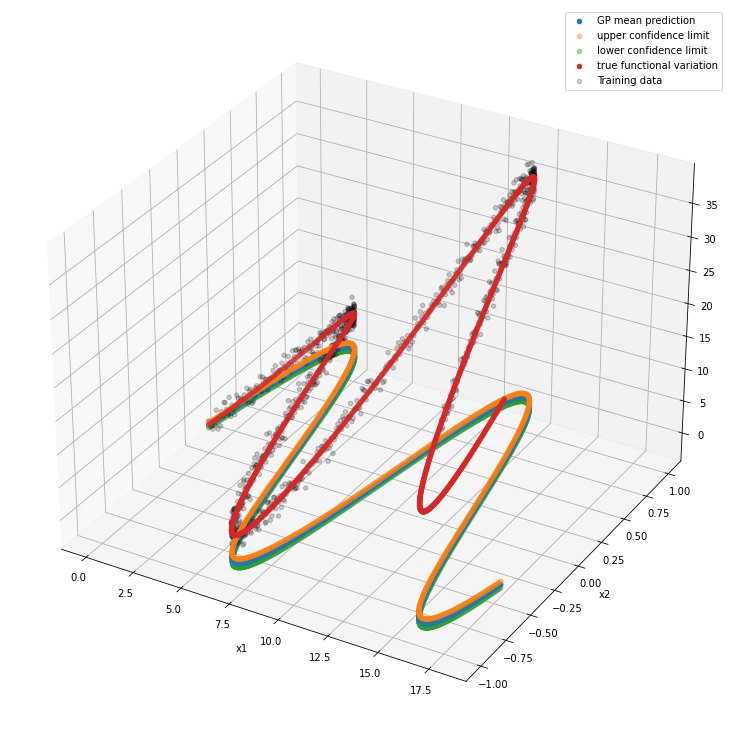

In [17]:
# Plot Results
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.scatter(X_star[:, 0], X_star[:, 1], Y_StarMean, label='GP mean prediction')
ax.scatter(X_star[:, 0], X_star[:, 1], Y_StarMean + (2 * Y_StarStd),alpha=0.4, label='upper confidence limit')
ax.scatter(X_star[:, 0], X_star[:, 1], Y_StarMean - (2 * Y_StarStd),alpha=0.4, label='lower confidence limit')

ax.scatter(X_star[:, 0], X_star[:, 1], f(r_star), label='true functional variation')
ax.scatter(x_train[:, 0], x_train[:, 1], y_train, color='black', alpha = 0.2, label='Training data')

plt.legend()

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()